In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv(r'housing.csv')
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [7]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
dataset_encoded=pd.get_dummies(dataset,drop_first=True)

In [13]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()
sc_cols=['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataset_encoded[sc_cols]=sc.fit_transform(dataset_encoded[sc_cols])

In [33]:
x=dataset_encoded[['area']]
y=dataset_encoded['price']

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred=lr.predict(x_test)

In [79]:
print("Simple Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Simple Linear Regression:
MAE: 1474748.1337969352
MSE: 3675286604768.1855
R²: 0.27287851871974633


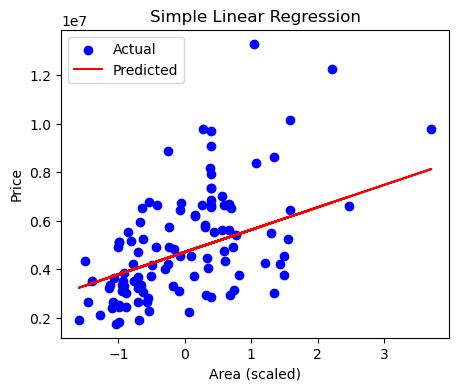

In [81]:
plt.figure(figsize=(5, 4))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel("Area (scaled)")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

#MULTIPLE LINEAR REGRESSION



In [88]:
x_multi=dataset_encoded.drop('price',axis=1)
y=dataset_encoded['price']

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x_multi,y,test_size=0.2,random_state=42)

In [92]:
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred=ml.predict(x_test)

In [100]:
print("\nMultipli Linear Regresssion")
print("MAE: ",mean_absolute_error)
print("MSE: ",mean_squared_error)
print("R2: ",r2_score(y_test,y_pred))


Multipli Linear Regresssion
MAE:  <function mean_absolute_error at 0x00000207E61BECA0>
MSE:  <function mean_squared_error at 0x00000207E61BF060>
R2:  0.6529242642153175


In [106]:
coefficients = pd.DataFrame({
    'Feature': x_multi.columns,
    'Coefficient': ml.coef_
})
print("\nModel Coefficients:",coefficients)



Model Coefficients:                             Feature    Coefficient
0                              area  511615.563777
1                          bedrooms   56615.572458
2                         bathrooms  549420.501241
3                           stories  353158.429856
4                           parking  193542.781675
5                      mainroad_yes  367919.947680
6                     guestroom_yes  231610.037176
7                      basement_yes  390251.176181
8               hotwaterheating_yes  684649.885339
9               airconditioning_yes  791426.735843
10                     prefarea_yes  629890.565313
11  furnishingstatus_semi-furnished -126881.817585
12     furnishingstatus_unfurnished -413645.062228


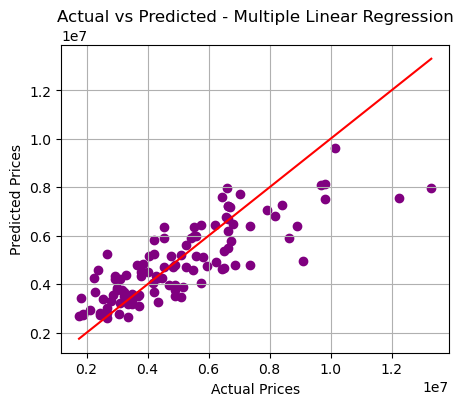

In [118]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted - Multiple Linear Regression")
plt.grid(True)
plt.show()
